<a href="https://colab.research.google.com/github/willbastosferreira/projetos_ds/blob/main/Consumo_Cerveja_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Regressão Linear

#### Predição do Consumo de Cerveja em São Paulo - SP

## Motivação

1. Análise do consumo de cerveja na cidade de São Paulo.
2. Base disponivel no Kaggle: [Base de Dados](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)
3. Convertendo valores categòricos em numéricos e analise exploratoria de dados (AED)
4. Separando a base entre treinamento e teste
5. Treinamento da Regressão Logística
6. Avaliação do modelo
7. Criar um simulador para predições futuras.

In [ ]:
# importe as bibliotecas

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [ ]:
# carregando arquivo


os.chdir('C:\\Users\\basfe\\Documents\\Python Scripts\\Learning Data Science  - Will\\Data')
dados = pd.read_excel('Consumo_cerveja.xlsx' )
dados.columns = ['data', 'temp_media', 'temp_min', 'temp_max', 'chuva','fds', 'consumo']
dados



,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,2015-07-22,14.52,12.8,16.1,0.0,0,14343
1,2015-06-01,16.28,15.2,18.0,2.2,0,16228
2,2015-06-19,14.66,13.2,17.7,3.8,0,16748
3,2015-05-11,17.86,15.7,20.6,22.2,0,16956
4,2015-09-09,18.82,15.8,22.9,58.0,0,16977
...,...,...,...,...,...,...,...
322,2015-01-20,27.68,23.3,35.6,0.6,0,35127
323,2015-10-31,23.18,18.2,29.3,0.0,1,35781
324,2015-10-15,28.12,18.9,35.8,0.0,0,35861
325,2015-01-11,27.62,22.2,34.8,3.4,1,36254


In [ ]:
dados.dtypes

data          datetime64[ns]
temp_media           float64
temp_min             float64
temp_max             float64
chuva                float64
fds                    int64
consumo                int64
dtype: object

**Configuração dos Dados**



In [ ]:
dados.shape

(327, 7)

In [ ]:
# algumas estatisticas descritivas



**Estatísticas Descritivas**

In [ ]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,327.00,327.00,327.00,327.00,327.00,327.00
mean,21.21,17.44,26.63,5.48,0.28,25325.53
std,3.19,2.83,4.34,12.82,0.45,4338.95
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,18.92,15.20,23.80,0.00,0.00,22004.50
50%,21.40,18.00,26.90,0.00,0.00,24862.00
75%,23.31,19.55,29.45,3.50,1.00,28448.50
max,28.30,24.50,36.50,94.80,1.00,37937.00


**Correlações**



In [ ]:
correl_ = dados.corr()['consumo'].drop('consumo')
correl_

temp_media    0.558519
temp_min      0.368377
temp_max      0.638652
chuva        -0.197131
fds           0.498072
Name: consumo, dtype: float64

In [ ]:
dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.03,-0.07,0.56
temp_min,0.86,1.00,0.67,0.10,-0.09,0.37
temp_max,0.92,0.67,1.00,-0.05,-0.05,0.64
chuva,0.03,0.10,-0.05,1.00,0.00,-0.20
fds,-0.07,-0.09,-0.05,0.00,1.00,0.50
consumo,0.56,0.37,0.64,-0.20,0.50,1.00


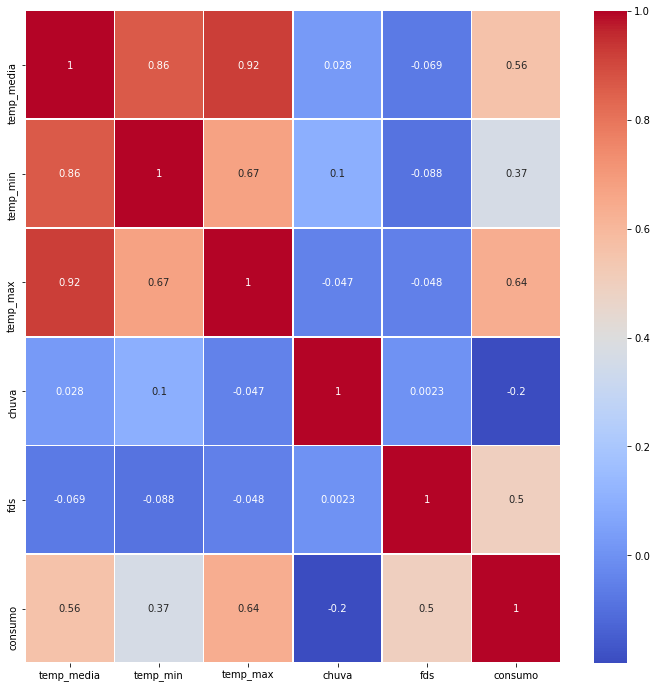

In [ ]:
## visualizando as correlacoes por meio de heat maps (em geral é a melhor maneira de visualizar)

correl_hm = dados.corr()

fig, ax = plt.subplots(figsize = (12,12))

sns.heatmap(correl_hm, cmap = "coolwarm", annot=True, linewidths=0.6, ax = ax)
plt.show()

**Análises Gráficas**



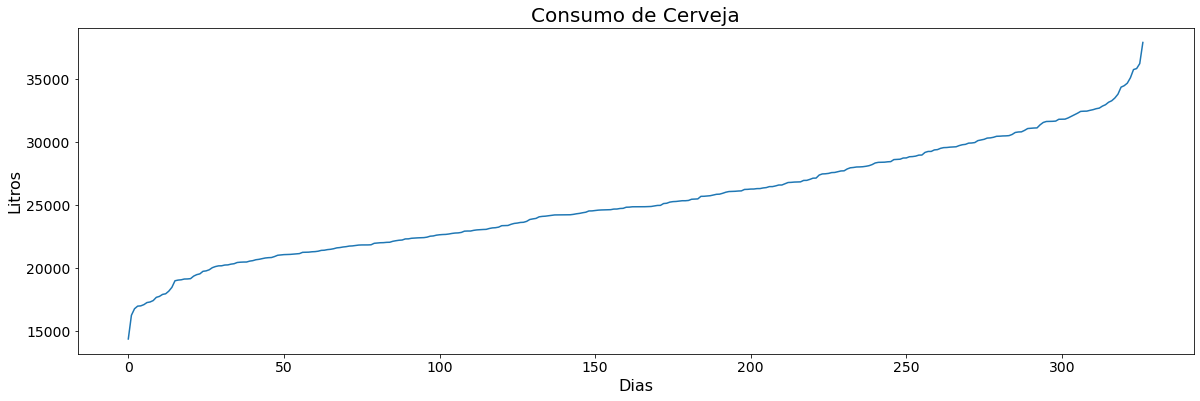

In [ ]:
fig, ax = plt.subplots(figsize = (20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Dias', fontsize = 16)


ax = dados['consumo'].plot(fontsize = 14)

plt.show()

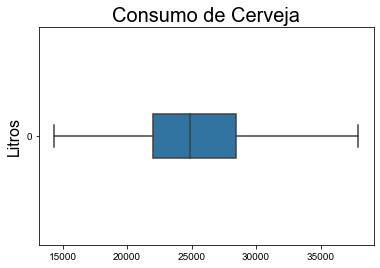

In [ ]:
## utilizando boxplot (seaborn)
boxplot_= sns.boxplot(data = dados['consumo'], orient ='h', width = 0.2)
sns.set_theme(style="whitegrid")
boxplot_.set_title('Consumo de Cerveja', fontsize=20)
boxplot_.set_ylabel('Litros', fontsize = 16)


plt.show()

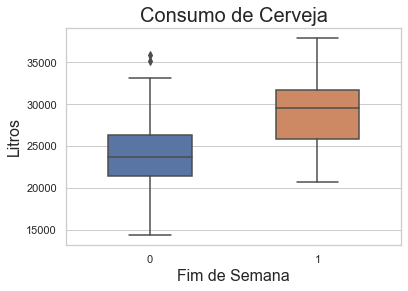

In [ ]:
## investigando a variavel dependente (y, alvo, etc) segundo determinada caracteristica

boxplot_= sns.boxplot(y = 'consumo', x = 'fds', data = dados, orient ='v', width = 0.5)
sns.set_theme(style="darkgrid")
sns.set_palette('deep')
boxplot_.set_title('Consumo de Cerveja', fontsize=20)
boxplot_.set_ylabel('Litros', fontsize = 16)
boxplot_.set_xlabel('Fim de Semana', fontsize = 16)

plt.show()

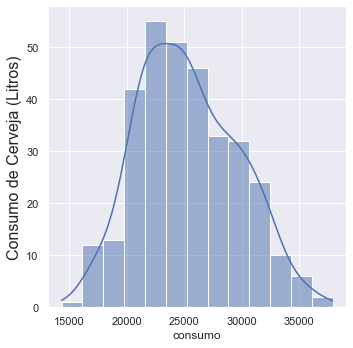

In [ ]:
## analisando a distribuicao de frequencias

dist_= sns.displot(data = dados['consumo'], kde = True)
dist_.set_titles('Distribuição de Frequências', fontsize=20)
dist_.set_ylabels('Consumo de Cerveja (Litros)', fontsize = 16)
plt.show()

#### Pairplot para Visualizar a Dispersão dos Dados entre as Variáveis

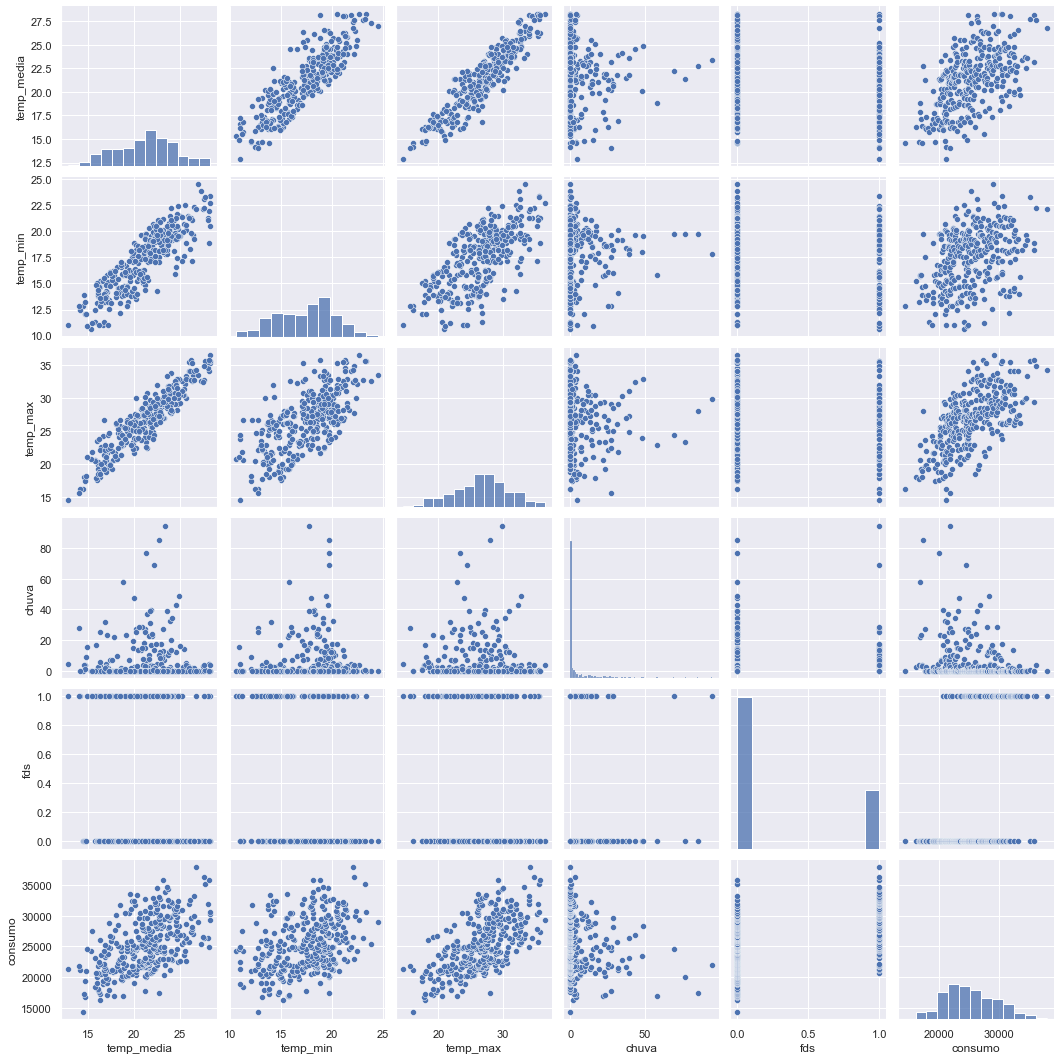

In [ ]:


dispersao = sns.pairplot(dados)
plt.show()

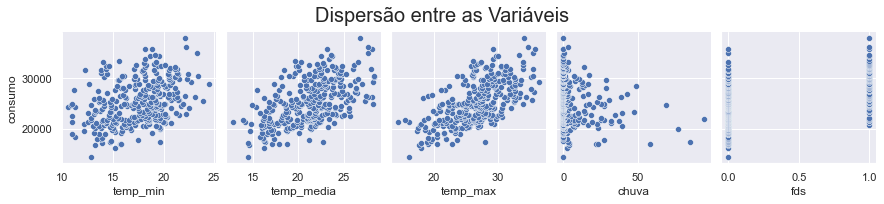

In [ ]:
## plotando o pairplot fixando somente uma variavel (o alvo, y)

dispersao = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_min','temp_media','temp_max','chuva','fds'])
dispersao.fig.suptitle('Dispersão entre as Variáveis', fontsize = 20, y = 1.1)
plt.show()

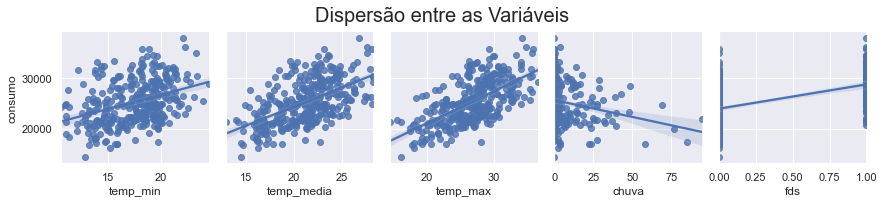

In [ ]:
## plotando pairplot fixando somente uma variavel (o alvo, y): utilizando o parametro 'reg'

dispersao = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_min','temp_media','temp_max','chuva','fds'], kind = 'reg')
dispersao.fig.suptitle('Dispersão entre as Variáveis', fontsize = 20, y = 1.1)
plt.show()

#### Joinplot (variável dependente x variáveis explicativas): Mostra os relacionamentos entre Duas variáveis e Suas Respectivas Dist. de Frequência


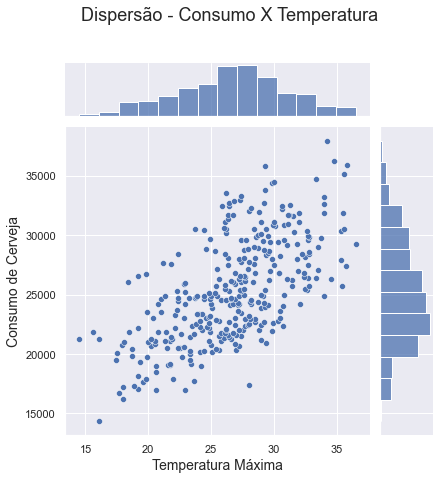

In [ ]:
## plotando joinplot(variavel dependente x variaveis explicativas): mostra os relacionamentos entre duas variaveis e suas respectivas dist. de frequencia
disp_joinplot = sns.jointplot(x = 'temp_max', y = 'consumo', data = dados)
disp_joinplot.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 18, y = 1.1)
disp_joinplot.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize = 14)
plt.show()

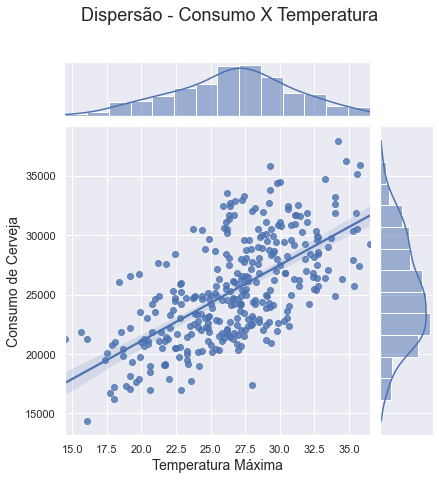

In [ ]:
## plotand com a reta

disp_joinplot = sns.jointplot(x = 'temp_max', y = 'consumo', data = dados, kind = 'reg')
disp_joinplot.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 18, y = 1.1)
disp_joinplot.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize = 14)
plt.show()

#### Lmplot (tem algumas ferramentas a mais do que pairplot e o joinplot)



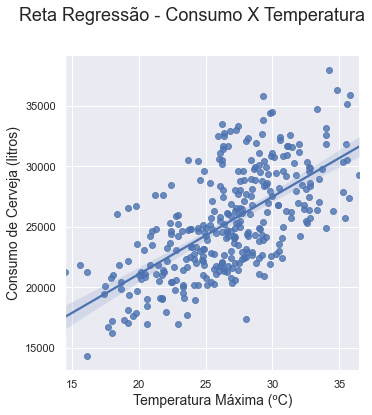

In [ ]:
disp_lmplot = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados)
disp_lmplot.fig.suptitle('Reta Regressão - Consumo X Temperatura', fontsize = 18, y = 1.1)
disp_lmplot.set_xlabels('Temperatura Máxima (ºC)', fontsize = 14)
disp_lmplot.set_ylabels('Consumo de Cerveja (litros)', fontsize = 14)
plt.show()

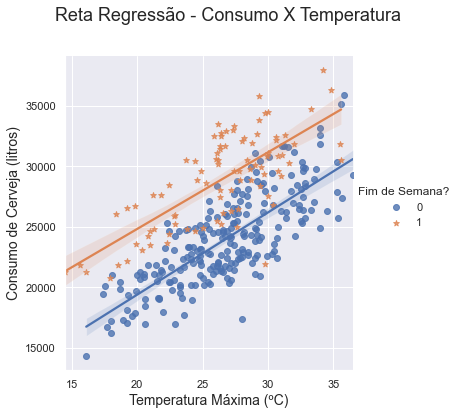

In [ ]:
## plotando um lmplot utilizando uma terceira variavel na analise (tipo I)

disp_lmplot = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, hue = 'fds', markers =['o', '*'], legend = False )
disp_lmplot.fig.suptitle('Reta Regressão - Consumo X Temperatura', fontsize = 18, y = 1.1)
disp_lmplot.set_xlabels('Temperatura Máxima (ºC)', fontsize = 14)
disp_lmplot.set_ylabels('Consumo de Cerveja (litros)', fontsize = 14)
disp_lmplot.add_legend(title='Fim de Semana?')
plt.show()

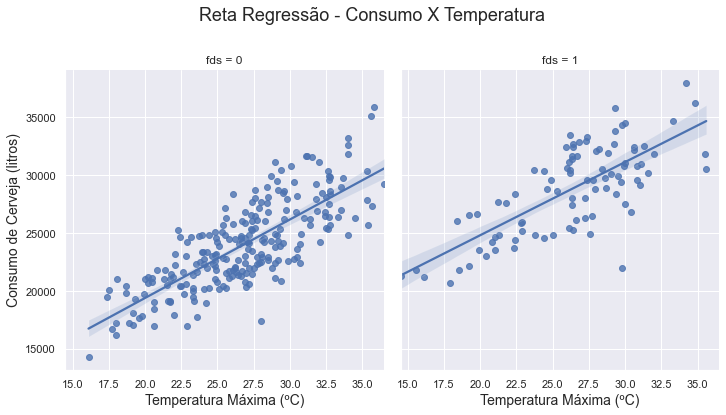

In [ ]:
## plotando um lmplot utilizando uma terceira variavel na analise (tipo I)
disp_lmplot = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, col = 'fds')
disp_lmplot.fig.suptitle('Reta Regressão - Consumo X Temperatura', fontsize = 18, y = 1.1)
disp_lmplot.set_xlabels('Temperatura Máxima (ºC)', fontsize = 14)
disp_lmplot.set_ylabels('Consumo de Cerveja (litros)', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Distribuiçao Consumo de Cerveja Quality')

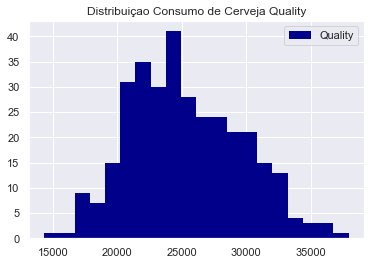

In [ ]:
# verificando a normalidade

plt.hist(dados['consumo'], bins = 20
         , histtype = 'stepfilled'
         , color = 'darkblue'
         , edgecolor = 'none'
         , label = 'Quality');

plt.legend()
plt.title('Distribuiçao Consumo de Cerveja Quality')
#plt.show()

# Tipo I - Estimando conforme Sklearn

In [ ]:
## treinamento e teste de regressao linear com sklearn
# separando os dados em teste e alvo: aquele em x e este em y
# utilizando a funcao train_test_split da biblioteca sklearn

x = dados.drop(['consumo','data'], axis = 1) # variaveis preditoras
y = dados.consumo # alvo (variavel dependente)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30)

## treinando o modelo

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# predicoes para o treinamento e teste

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

### metricas de avaliacao: MAE, R2 e RMSE

from math import sqrt
#  avaliando os dados de treinamentos
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
R2_train = metrics.r2_score(y_train, y_pred_train)  # coeficiente de determinacao
RMSE_train = sqrt(metrics.mean_squared_error(y_train, y_pred_train))

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train,2))
print('R2: ', round(R2_train,2))
print('RMSE: ', round(RMSE_train,2))

----- Avaliaçao do treinamento -----
MAE:  1887.97
R2:  0.74
RMSE:  2212.84


In [ ]:
# agora para os dados de teste

MAE_test = metrics.mean_absolute_error(y_test,y_pred_test)
R2_test = metrics.r2_score(y_test, y_pred_test)
RMSE_test = sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test,2))
print('R2: ', round(R2_test,2))
print('RMSE: ', round(RMSE_test,2))

# observe apenas para os dados de teste e verique o percentual do MAE em relacao da base

print('A média de consumo é: ')
print(round(y_test.mean(),2))
print()
print('o percentual do MAE em relação à média da base é: ')
print(round(MAE_test/y_test.mean() * 100,2))                 # numeros razoaveis sao aqueles abaixo de 10%


----- Avaliaçao do teste -----
MAE:  2155.04
R2:  0.66
RMSE:  2543.54
A média de consumo é: 
24985.41

o percentual do MAE em relação à média da base é: 
8.63


In [ ]:
## visualizacao dos resultados

# resultados: Real x Previsto em um dataframe

resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_test})
resultados

,Real,Previsto
288,30943,32455.910556
37,20464,21878.135387
268,29799,30768.834197
147,24429,24926.695755
82,22008,23988.679170
...,...,...
259,29386,31227.891585
7,17287,19144.353407
238,28131,27922.877251
52,21073,20823.363000


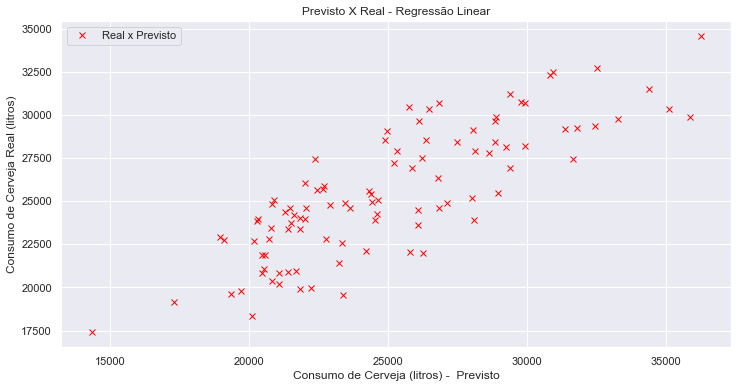

In [ ]:
# em grafico para o teste

plt.figure(figsize = (12,6))
plt.plot(y_test, y_pred_test, "x", color = "red", label = "Real x Previsto")
plt.legend()
plt.xlabel("Consumo de Cerveja (litros) -  Previsto")
plt.ylabel("Consumo de Cerveja Real (litros)")
plt.title("Previsto X Real - Regressão Linear");
plt.show()

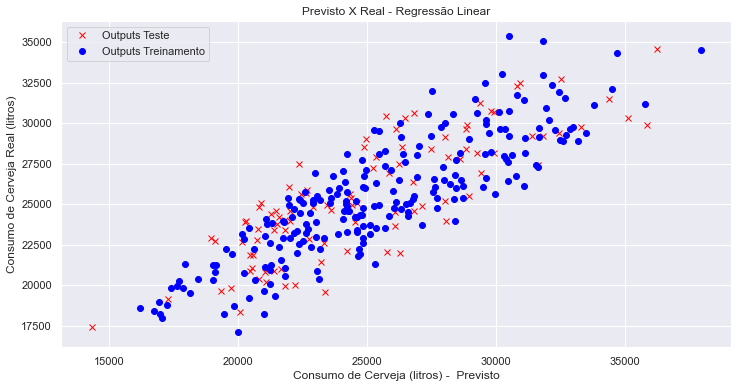

In [ ]:
# em grafico para o teste e treinamento

plt.figure(figsize = (12,6))
plt.plot(y_test, y_pred_test, linestyle = '', marker = 'x', color = 'red', label = "Outputs Teste")
plt.plot( y_train, y_pred_train, linestyle = '', marker = 'o', color = 'blue',label = 'Outputs Treinamento')
plt.legend(loc = 'upper left')
plt.xlabel("Consumo de Cerveja (litros) -  Previsto")
plt.ylabel("Consumo de Cerveja Real (litros)")
plt.title("Previsto X Real - Regressão Linear");
plt.show()

# Tipo II - Estimando conforme Sklearn

## Crie um simulador simples para o modelo de regressao

In [ ]:
x.head()

,temp_media,temp_min,temp_max,chuva,fds
0,14.52,12.8,16.1,0.0,0
1,16.28,15.2,18.0,2.2,0
2,14.66,13.2,17.7,3.8,0
3,17.86,15.7,20.6,22.2,0
4,18.82,15.8,22.9,58.0,0


In [ ]:
temp_media = 31
temp_min = 22
temp_max = 36
chuva = 0
fds = 1
data_in = [[temp_media, temp_min, temp_max, chuva, fds]]

print('{0:.2f} litros'.format(lr.predict(data_in)[0]))

34792.13 litros


In [ ]:
### entendendo os coeficientes da regressao

lr.coef_

# mostrando os coeficientes (pesos) da regressao
coef = pd.DataFrame(lr.coef_)
coef.columns.name = 'Variáveis'
coef


Variáveis,0
0,-269.215970
1,123.576307
2,780.312059
3,-64.247772
4,5169.148505


In [ ]:
lr.intercept_

## a equacao da regressao é:

# lr = 2.6317948224381515 + 0.022459 x fixed acidity - 1.237338 x volatile acidity + 0.007556 x residual sugar - 1.755196 x chlorides - 0.000692 x free sulfur dioxide + 0.958362x sulphates + 0.282829 x alcohol

7158.766487555811

In [ ]:
x.columns

Index(['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'], dtype='object')

In [ ]:
index = ['Intercepto', 'Temperatura Média','Temperatura Mínima','Temperatura Máxima', 'Chuva (mm)', 'Fim de Semana']

lr_coef = pd.DataFrame(data=np.append(lr.intercept_,lr.coef_), index=index, columns=['Parâmetros'])
lr_coef.columns.name = 'Preditoras'
lr_coef

Preditoras,Parâmetros
Intercepto,7158.766488
Temperatura Média,-269.215970
Temperatura Mínima,123.576307
Temperatura Máxima,780.312059
Chuva (mm),-64.247772
Fim de Semana,5169.148505


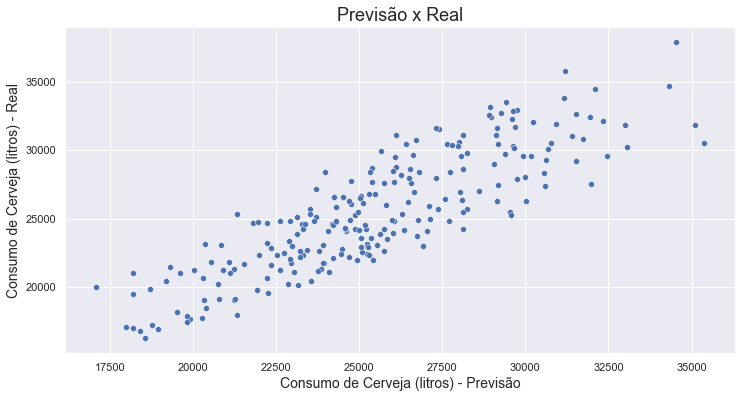

In [ ]:
## mais algumas analises graficas para o treinamento

ax = sns.scatterplot(x = y_pred_train, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize = 14)

plt.show()


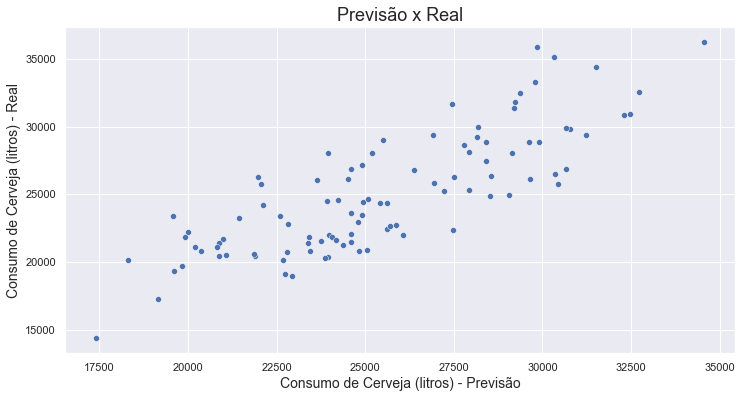

In [ ]:
## mais algumas analises graficas para o teste

ax = sns.scatterplot(x = y_pred_test, y = y_test)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize = 14)

plt.show()

In [ ]:
residuos = y_train - y_pred_train

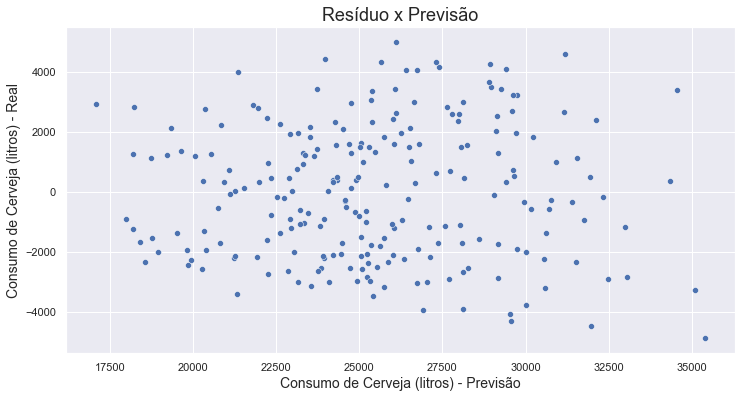

In [ ]:
## grafico de deipsersao entre o valor estimado e residuos: base de dados do treinamento
## um teste informal para verificar a homocedasticidade (variância constante dos residuos)
ax = sns.scatterplot(x = y_pred_train, y = residuos)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduo x Previsão', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize = 14)

plt.show()

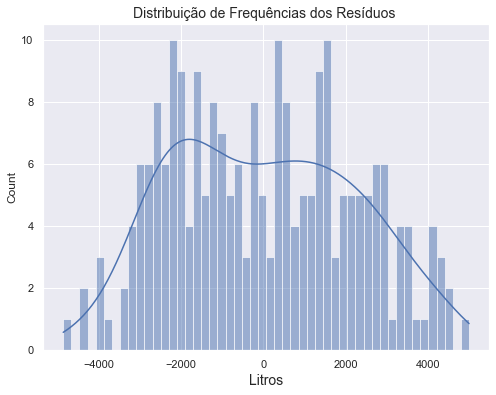

In [ ]:
## plote a distribuiçao de frequencias dos resíduos

ax = sns.histplot(residuos, kde = True, bins = 50)
ax.figure.set_size_inches(8,6)
ax.set_title('Distribuição de Frequências dos Resíduos ', fontsize = 14)
ax.set_xlabel('Litros', fontsize = 14)
#ax.set_ylabel('Litros', fontsize = 14)

plt.show()

# Salvando o Modelo: Projeto Regressão Linear - Consumo Médio de Cerveja em São Paulo - SP

### Salvando e carregando para predições futuras.

In [ ]:
import pickle

In [ ]:
output = open('lr_modelo_consumo_cerveja','wb')
pickle.dump(lr, output)
output.close()

# Utilizando a StatsModels

### Segundo modo de realizar a regressão linear.

In [ ]:
## agora utilize a statsmodels (altamente utilizado)

# por padrao o statsmodels nao acrescento o intercepto
# tem que acrescenta-lo manualmente

x_train2 = sm.add_constant(x_train)
x_test2 = sm.add_constant(x_test)

lr_sm = sm.OLS(y_train, x_train2).fit()

y_pred_train_sm = lr_sm.predict(x_train2)

y_pred_test_sm = lr_sm.predict(x_test2)

# print out the statisctics

lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consumo   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           2.95e-62
Time:                        10:52:53   Log-Likelihood:                -2079.6
No. Observations:                 228   AIC:                             4171.
Df Residuals:                     222   BIC:                             4192.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7158.7665   1029.629      6.953      0.000    5129.669    9187.864
temp_media  -269.2160    229.337     -1.174      0.242    -721.171     182.739
temp_min     123.5763    131.386      0.941      0.348    -135.347     382.500
temp_max     780.3121    117.288      6.653      0.000     549.171    1011.453
chuva        -64.2478     10.705     -6.002      0.000     -85.344     -43.152
fds         5169.1485    332.869     15.529      0.000    4513.162    5825.135
==============================================================================
Omnibus:                       26.245   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.499
Skew:                           0.144   Prob(JB):                       0.0143
Kurtosis:                       2.099   Cond. No.                         272.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# avalie os resultados com statsmodels

MAE_train_sm = sm.tools.eval_measures.meanabs(y_train, y_pred_train_sm)
R2_train_sm = lr_sm.rsquared # Coeficiente de determinaçao
RMSE_train_sm = sm.tools.eval_measures.rmse(y_train, y_pred_train_sm)

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train_sm,2))
print('R2: ', round(R2_train_sm,2))
print('RMSE: ', round(RMSE_train_sm,2))

----- Avaliaçao do treinamento -----
MAE:  1887.97
R2:  0.74
RMSE:  2212.84


In [ ]:
MAE_test_sm = sm.tools.eval_measures.meanabs(y_test, y_pred_test)
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test, y_pred_test)

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test_sm,2))
print('RMSE: ', round(RMSE_test_sm,2))


----- Avaliaçao do teste -----
MAE:  2155.04
RMSE:  2543.54


In [ ]:
# mostre os coeficientes (pesos) da regressao

print(lr_sm.params)

const         7158.766488
temp_media    -269.215970
temp_min       123.576307
temp_max       780.312059
chuva          -64.247772
fds           5169.148505
dtype: float64


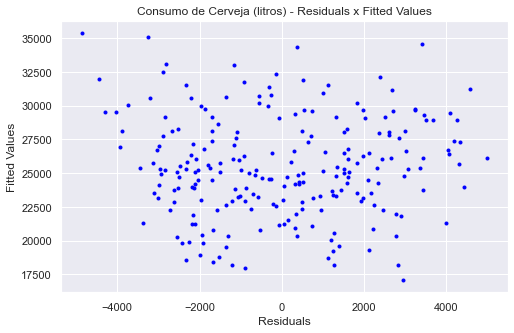

In [ ]:
## diagnostico da regressao

lr_sm.resid

# Residuals x Fitted Values

plt.figure(figsize = (8,5))
plt.plot(lr_sm.resid, y_pred_train_sm, ".", color = "blue")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Consumo de Cerveja (litros) - Residuals x Fitted Values");
plt.show()


#### Conclusão

Neste trabalho podemos observar que o modelo de regressão linear teve um bom resultado validade através das métricas do modelo. O trabalho mostrou por análises gráficas relações entre as variáveis e a variável alvo, observando que algumas são mais relevante do que outras para explicar e predizer o consumo de cerveja.